In [44]:
# Importing Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set()

In [45]:
# import the movies Dataset 
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [46]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [47]:
df.shape

(7668, 15)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [49]:
# checking for missing values 
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [50]:
# Loop through every column to see the missing values percentage on it 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} : {}%'.format(col, pct_missing))

name : 0.0%
rating : 0.010041731872717789%
genre : 0.0%
year : 0.0%
released : 0.0002608242044861763%
score : 0.0003912363067292645%
votes : 0.0003912363067292645%
director : 0.0%
writer : 0.0003912363067292645%
star : 0.00013041210224308815%
country : 0.0003912363067292645%
budget : 0.2831246739697444%
gross : 0.02464788732394366%
company : 0.002217005738132499%
runtime : 0.0005216484089723526%


In [51]:
# the most missing values are in Budget column so we look at it 
budget_missing = df[df['budget'].isnull()]

In [52]:
budget_missing

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [53]:
df_cleaned = df.dropna()

In [54]:
df_cleaned.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [55]:
df_cleaned.shape

(5421, 15)

In [56]:
# Check duplicates 
df.duplicated().sum()

0

In [57]:
df_cleaned.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [69]:
# changing the budget and gross column into int

df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
df_cleaned.head(20)

<ipython-input-69-2a601eba1b55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
<ipython-input-69-2a601eba1b55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['gross'] = df_cleaned['gross'].astype('int64')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [70]:
# there's some values in the country & year columns that donot match the actual values in the realeased column 
# so i'll remove the 2 columns and extract the exact information from the released column 

In [75]:
df_cleaned.drop(['year', 'country'], axis=1, inplace=True)

C:\Users\7emdan\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
df_cleaned.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [67]:
df_cleaned['country'].unique()

array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
       'Canada', 'Australia', 'Italy', 'South Korea', 'Sweden', 'Spain',
       'Hong Kong', 'Mexico', 'Switzerland', 'France', 'New Zealand',
       'Japan', 'Yugoslavia', 'Ireland', 'Germany', 'Austria', 'Portugal',
       'China', 'Taiwan', 'Republic of Macedonia', 'Russia',
       'Federal Republic of Yugoslavia', 'Iran', 'Czech Republic',
       'Denmark', 'Jamaica', 'Brazil', 'Aruba', 'Argentina', 'India',
       'Netherlands', 'Colombia', 'Norway', 'Israel', 'Belgium',
       'United Arab Emirates', 'Indonesia', 'Hungary', 'Kenya', 'Iceland',
       'Chile', 'Finland', 'Panama', 'Malta', 'Lebanon', 'Thailand'],
      dtype=object)

In [68]:
df_cleaned['country'].value_counts()

United States                     4319
United Kingdom                     492
Canada                             111
France                             105
Germany                             82
Australia                           42
Japan                               28
China                               26
Hong Kong                           24
Ireland                             21
Italy                               19
New Zealand                         18
Spain                               18
South Korea                         13
Mexico                              11
Denmark                             10
India                                8
Czech Republic                       7
Sweden                               5
South Africa                         4
Belgium                              4
Switzerland                          4
Russia                               4
Netherlands                          3
Argentina                            3
Taiwan                   

In [66]:
df_cleaned['released']

0           June 13, 1980 (United States)
1            July 2, 1980 (United States)
2           June 20, 1980 (United States)
3            July 2, 1980 (United States)
4           July 25, 1980 (United States)
                      ...                
7648     January 17, 2020 (United States)
7649    February 14, 2020 (United States)
7650     January 17, 2020 (United States)
7651    February 21, 2020 (United States)
7652      August 28, 2020 (United States)
Name: released, Length: 5421, dtype: object

In [110]:
df_cleaned.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,released_month,released_day,released_country
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146.0,1980,June,"13,",(United States)
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104.0,1980,July,"2,",(United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124.0,1980,June,"20,",(United States)
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88.0,1980,July,"2,",(United States)
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98.0,1980,July,"25,",(United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,90000000,426505244,Columbia Pictures,124.0,2020,January,"17,",(United States)
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,85000000,319715683,Paramount Pictures,99.0,2020,February,"14,",(United States)
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,175000000,245487753,Universal Pictures,101.0,2020,January,"17,",(United States)
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,135000000,111105497,20th Century Studios,100.0,2020,February,"21,",(United States)


In [71]:
released_df = df_cleaned['released'].str.split(' ', n=3, expand=True)
released_df

,0,1,2,3
0,June,"13,",1980,(United States)
1,July,"2,",1980,(United States)
2,June,"20,",1980,(United States)
3,July,"2,",1980,(United States)
4,July,"25,",1980,(United States)
...,...,...,...,...
7648,January,"17,",2020,(United States)
7649,February,"14,",2020,(United States)
7650,January,"17,",2020,(United States)
7651,February,"21,",2020,(United States)


In [76]:
df_cleaned['released_year'] = released_df[2]
df_cleaned['released_month'] = released_df[0]
df_cleaned['released_day']= released_df[1]
df_cleaned['released_country'] = released_df[3]
df_cleaned.head(20)

<ipython-input-76-e477ed69e8dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['released_year'] = released_df[2]
<ipython-input-76-e477ed69e8dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['released_month'] = released_df[0]
<ipython-input-76-e477ed69e8dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,released_month,released_day,released_country
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000,46998772,Warner Bros.,146.0,1980,June,"13,",(United States)
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000,58853106,Columbia Pictures,104.0,1980,July,"2,",(United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000,538375067,Lucasfilm,124.0,1980,June,"20,",(United States)
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000,83453539,Paramount Pictures,88.0,1980,July,"2,",(United States)
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000,39846344,Orion Pictures,98.0,1980,July,"25,",(United States)
5,Friday the 13th,R,Horror,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,550000,39754601,Paramount Pictures,95.0,1980,May,"9,",(United States)
6,The Blues Brothers,R,Action,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,27000000,115229890,Universal Pictures,133.0,1980,June,"20,",(United States)
7,Raging Bull,R,Biography,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,18000000,23402427,Chartoff-Winkler Productions,129.0,1980,December,"19,",(United States)
8,Superman II,PG,Action,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,54000000,108185706,Dovemead Films,127.0,1981,June,"19,",(United States)
9,The Long Riders,R,Biography,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,10000000,15795189,United Artists,100.0,1980,May,"16,",(United States)


In [62]:
df_cleaned['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

In [63]:
df_cleaned['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [64]:
df_cleaned['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [65]:
df_cleaned['company'].value_counts()

Universal Pictures       330
Columbia Pictures        302
Warner Bros.             298
Paramount Pictures       279
Twentieth Century Fox    209
                        ... 
Guild                      1
Vertigo Films              1
3Mark Entertainment        1
Ladbroke                   1
Frenesy Film Company       1
Name: company, Length: 1475, dtype: int64

In [81]:
# Compare the gross in each company 
avg_gross_per_comp = df_cleaned.groupby('company')['gross'].mean().sort_values(ascending=False).head(10)
avg_gross_per_comp

company
Marvel Studios                                                   1.255466e+09
Illumination Entertainment                                       1.097122e+09
Fairview Entertainment                                           9.665549e+08
B24                                                              8.806815e+08
Avi Arad Productions                                             8.560852e+08
Chris Morgan Productions                                         7.590569e+08
Jolie Pas                                                        7.584118e+08
Lucasfilm                                                        7.185352e+08
Marvel Entertainment                                             7.144215e+08
Beijing Dengfeng International Culture Communications Company    6.999925e+08
Name: gross, dtype: float64

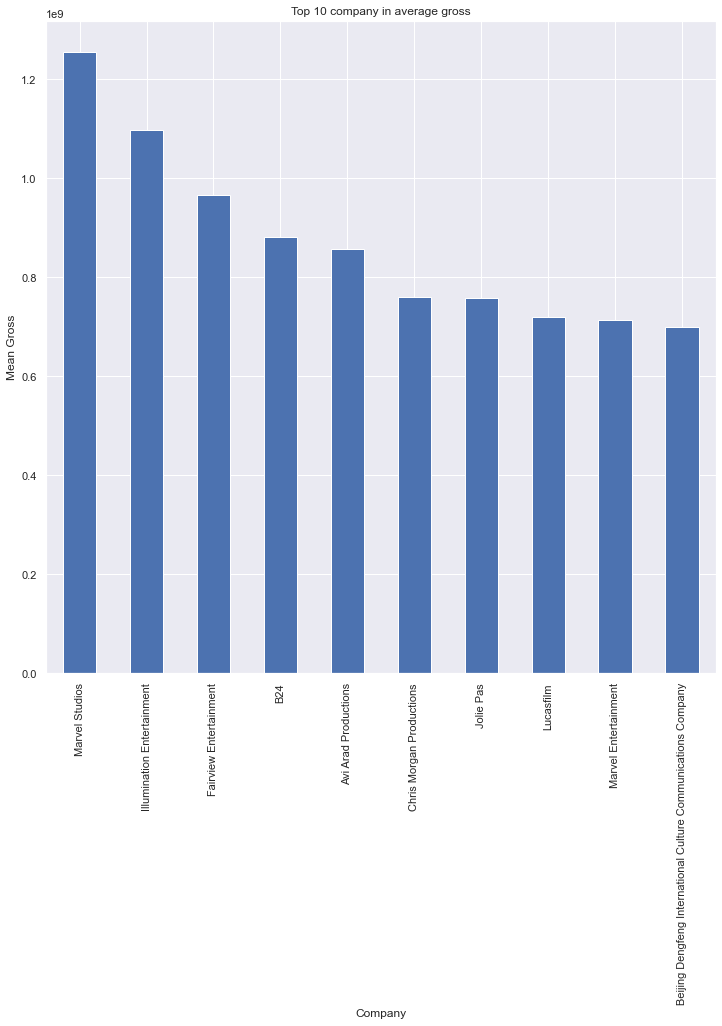

In [88]:
plt.figure(figsize=(12,12))

avg_gross_per_comp.plot(kind='bar')
plt.title('Top 10 company in average gross')
plt.xlabel('Company')
plt.ylabel('Mean Gross')
plt.show()

- Marvel Studio has the hieghest gross, illumination Entertainment come next

In [87]:
# Compare the budget by each company 

avg_budget_per_comp = df_cleaned.groupby('company')['budget'].mean().sort_values(ascending=False).head(10)
avg_budget_per_comp

company
B24                         245000000.0
Marvel Studios              222000000.0
The Halcyon Company         200000000.0
C-2 Pictures                200000000.0
Chris Morgan Productions    200000000.0
Jolie Pas                   180000000.0
Fairview Entertainment      175000000.0
FortyFour Studios           172500000.0
Marvel Entertainment        170000000.0
Roth Films                  170000000.0
Name: budget, dtype: float64

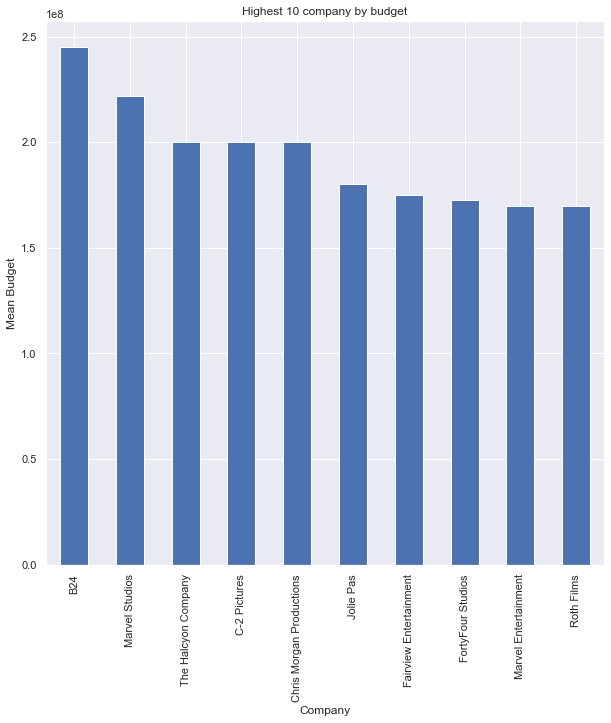

In [89]:
plt.figure(figsize=(10,10))
avg_budget_per_comp.plot(kind='bar')
plt.title('Highest 10 company by budget')
plt.xlabel('Company')
plt.ylabel('Mean Budget')
plt.show()

- B24 has the highest budget although it settle in 4th for mean gross, while Marvel Studios comes in the second place in budget 

In [93]:
df_cleaned['released_year'].unique()

array(['1980', '1981', '1984', '1983', '1982', None, '1987', '(United',
       '1985', '1986', 'States)', '1990', '1988', '1992', '1989', '1991',
       '1999', '1994', '1993', '1995', '2001', '1996', '2000', '1997',
       '1998', '2002', '2003', '2004', '2014', '2005', '2006', '2007',
       '2008', '2010', '2009', '2013', '2011', '2016', '2015', '2012',
       '(Australia)', '2017', '2018', '2019', '2020'], dtype=object)

In [103]:
# Top 30 gross made by companies in each year from 1980 tom 2019
gross_by_com_year = df_cleaned.pivot_table(values='gross', index=['released_year', 'company', 'name']).sort_values('gross', ascending=False).head(30)
gross_by_com_year

,,,gross
released_year,company,name,
2009,Twentieth Century Fox,Avatar,2847246203
2019,Marvel Studios,Avengers: Endgame,2797501328
1997,Twentieth Century Fox,Titanic,2201647264
2015,Lucasfilm,Star Wars: Episode VII - The Force Awakens,2069521700
2018,Marvel Studios,Avengers: Infinity War,2048359754
2019,Walt Disney Pictures,The Lion King,1670727580
2015,Universal Pictures,Jurassic World,1670516444
2012,Marvel Studios,The Avengers,1518815515
2015,Universal Pictures,Furious 7,1515341399


- well 2009 avatar movies still in the lead, avengers endGame comes next 

In [104]:
# let's see how match the gross table with the votes 
votes_by_com_year = df_cleaned.pivot_table(values='votes', index=['released_year', 'company', 'name']).sort_values('votes', ascending=False).head(30)
votes_by_com_year

votes
released_year company                       name                                                        
2008          Warner Bros.                  The Dark Knight                                    2400000.0
1994          Castle Rock Entertainment     The Shawshank Redemption                           2400000.0
2010          Warner Bros.                  Inception                                          2100000.0
1999          Fox 2000 Pictures             Fight Club                                         1900000.0
1994          Paramount Pictures            Forrest Gump                                       1900000.0
              Miramax                       Pulp Fiction                                       1900000.0
2001          New Line Cinema               The Lord of the Rings: The Fellowship of the Ring  1700000.0
2003          New Line Cinema               The Lord of the Rings: The Return of the King      1700000.0
1999          Warner Bros.                  The Matrix                                         1700000.0
2012          Warner Bros.                  The Dark Knight Rises                              1600000.0
2014          Paramount Pictures            Interstellar                                       1600000.0
1995          Cecchi Gori Pictures          Se7en                                              1500000.0
2002          New Line Cinema               The Lord of the Rings: The Two Towers              1500000.0
2000          Dreamworks Pictures           Gladiator                                          1400000.0
2012          The Weinstein Company         Django Unchained                                   1400000.0
1998          Dreamworks Pictures           Saving Private Ryan                                1300000.0
2005          Warner Bros.                  Batman Begins                                      1300000.0
2012          Marvel Studios                The Avengers                                       1300000.0
2009          Universal Pictures            Inglourious Basterds                               1300000.0
1991          Strong Heart/Demme Production The Silence of the Lambs                           1300000.0
1999          Castle Rock Entertainment     The Green Mile                                     1200000.0
2010          Paramount Pictures            Shutter Island                                     1200000.0
2006          Touchstone Pictures           The Prestige                                       1200000.0
2001          Newmarket Capital Group       Memento                                            1200000.0
2006          Warner Bros.                  The Departed                                       1200000.0
1994          Universal Pictures            Schindler's List                                   1200000.0
2013          Red Granite Pictures          The Wolf of Wall Street                            1200000.0
1980          Lucasfilm                     Star Wars: Episode V - The Empire Strikes Back     1200000.0
2009          Twentieth Century Fox         Avatar                                             1100000.0
2014          Marvel Studios                Guardians of the Galaxy                            1100000.0

- well in kind of votes The Dark Knight, The Shawshank Redemption comes in first, while Inception comes next 

In [105]:
# now let's see the scores collected by each director and for what movie exactly 

scores_by_director = df_cleaned.pivot_table(values='score', index=['director', 'name']).sort_values('score', ascending=False).head(30)
scores_by_director



,,score
director,name,
Frank Darabont,The Shawshank Redemption,9.3
Christopher Nolan,The Dark Knight,9.0
Peter Jackson,The Lord of the Rings: The Return of the King,8.9
Quentin Tarantino,Pulp Fiction,8.9
Steven Spielberg,Schindler's List,8.9
David Fincher,Fight Club,8.8
Robert Zemeckis,Forrest Gump,8.8
Peter Jackson,The Lord of the Rings: The Fellowship of the Ring,8.8
Christopher Nolan,Inception,8.8


- the most director gets score is  Frank Darabont for the movie The Shawshank Redemption, not surprising it's a really good movie, although he apears in this list for 2 times only,while the highest director apears in this list is Christopher Nolan with 4 times, 

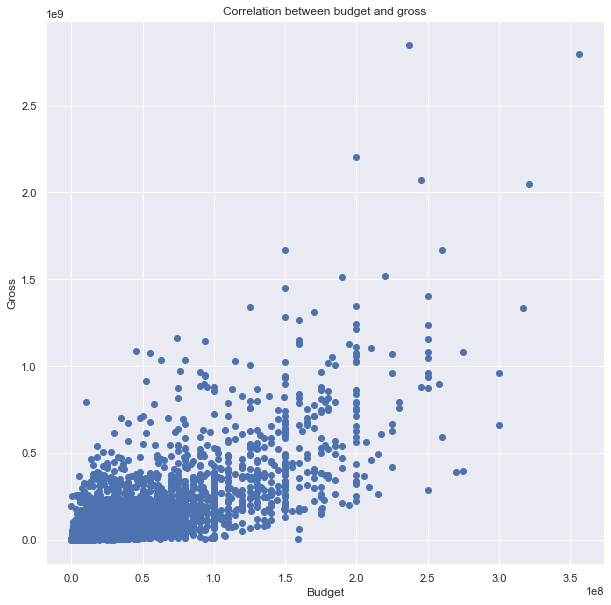

In [112]:
# find out the corelation between the gross and the budget 
plt.figure(figsize=(10,10))
plt.scatter(x=df_cleaned['budget'], y=df_cleaned['gross'])
plt.title('Correlation between budget and gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

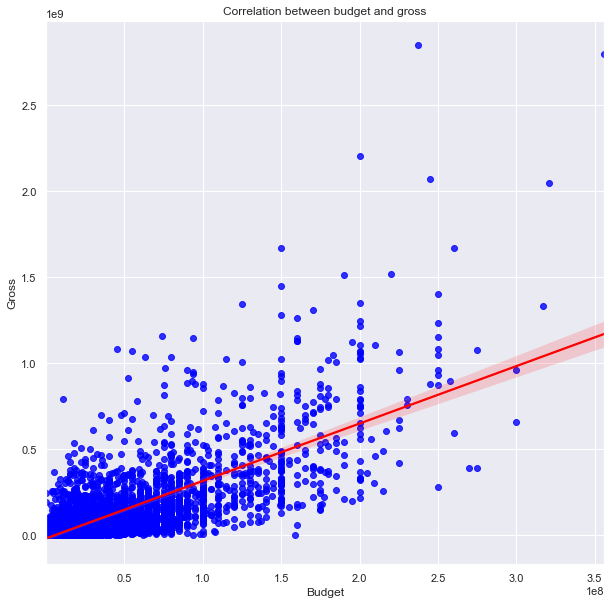

In [114]:
# Using seaborn library 
plt.figure(figsize=(10,10))
sns.regplot(x='budget', y='gross', data=df_cleaned, scatter_kws={'color' : 'blue'}, line_kws= {'color': 'red'})
plt.title('Correlation between budget and gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

- the two plots shows that there's a positive corelation between the film budget and it's gross 

In [107]:
# Discover the correlation of the data variables 

corr_matrix = df_cleaned.corr()
corr_matrix

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


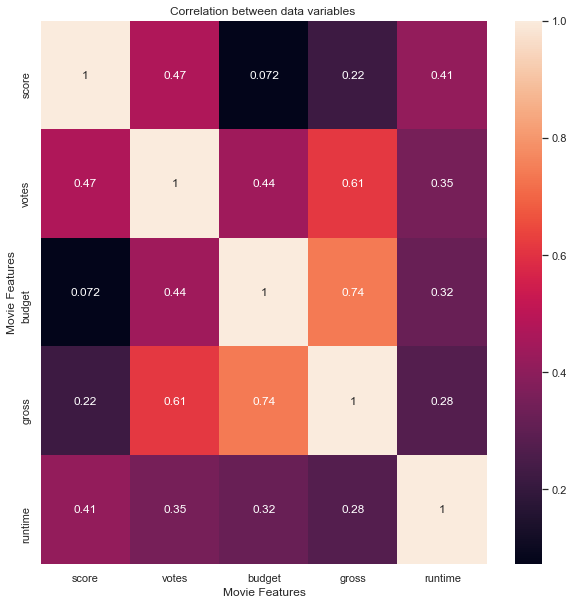

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation between data variables ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

- The most 2 variables that have stron corelation to the gross are (budget, votes) respectively, thus with more budget spent in a movie it gain more gross, also with more votes the film gets, it gets more gain, Although what if there's a categorical variable that might has corelation with the gross, let's find out 


In [117]:
# First we should transform the object values into categorical so that we can transform it into cat_codes 

df_normalized = df_cleaned 

In [118]:
for col_name in df_normalized.columns:
    if (df_normalized[col_name].dtype == 'object'):
        df_normalized[col_name]=df_normalized[col_name].astype('category')
        df_normalized[col_name]=df_normalized[col_name].cat.codes
        
df_normalized

<ipython-input-118-b5fc74f298cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized[col_name]=df_normalized[col_name].astype('category')
<ipython-input-118-b5fc74f298cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized[col_name]=df_normalized[col_name].cat.codes


,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,released_month,released_day,released_country
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,19000000,46998772,1426,146.0,2,11,7,47
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,4500000,58853106,452,104.0,2,10,19,47
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,18000000,538375067,945,124.0,2,11,20,47
3,204,4,4,1127,7.7,221000.0,889,1413,1474,3500000,83453539,1108,88.0,2,10,19,47
4,732,6,4,1170,7.3,108000.0,719,351,271,6000000,39846344,1083,98.0,2,10,26,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000.0,16,2390,1812,90000000,426505244,452,124.0,42,9,11,47
7649,3556,4,0,713,6.5,102000.0,852,2309,147,85000000,319715683,1108,99.0,42,8,8,47
7650,1153,4,1,904,5.6,53000.0,1809,2827,1470,175000000,245487753,1397,101.0,42,9,11,47
7651,3978,4,1,758,6.8,42000.0,294,2091,640,135000000,111105497,12,100.0,42,8,22,47


In [119]:
normalize_corr = df_normalized.corr()
normalize_corr

,name,rating,genre,released,score,votes,director,writer,star,budget,gross,company,runtime,released_year,released_month,released_day,released_country
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,0.023392,0.005639,0.021697,0.010850,0.026784,-0.007371,0.011375,-0.003355
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,-0.203946,-0.181906,-0.092357,0.140792,0.019749,0.015532,0.038068,-0.063631
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.368523,-0.244101,-0.071334,-0.059237,-0.067962,0.021306,-0.005936,-0.079901
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,0.019952,0.008501,-0.002407,0.008975,-0.008821,0.996181,0.096232,-0.017500
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,0.072001,0.222556,0.020656,0.414068,0.061059,0.045136,-0.004127,-0.040326
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.439675,0.614751,0.118470,0.352303,0.202953,0.027535,0.003200,0.067673
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,-0.009662,-0.029560,-0.008223,0.017433,-0.035162,0.003497,-0.011039,-0.005493
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,-0.039466,-0.035885,-0.003697,-0.017561,-0.022050,0.007594,0.001683,0.000052
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.021473,-0.000004,0.014082,0.010108,-0.031631,0.014919,0.013504,-0.021197
budget,0.023392,-0.203946,-0.368523,0.019952,0.072001,0.439675,-0.009662,-0.039466,-0.021473,1.000000,0.740247,0.170235,0.318695,0.320216,0.018328,0.001608,0.127614


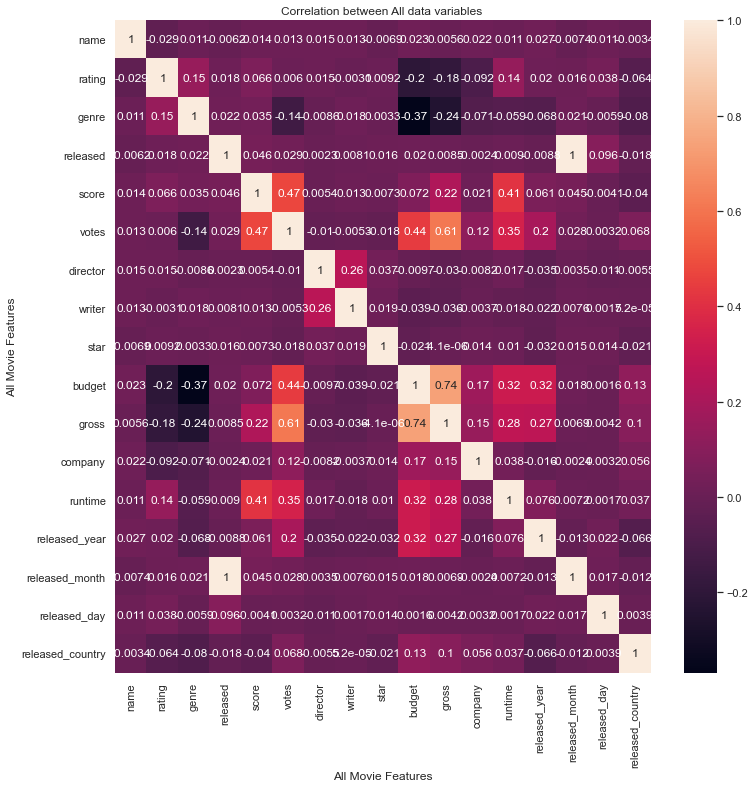

In [123]:
plt.figure(figsize=(12,12))
sns.heatmap(normalize_corr, annot=True)
plt.title('Correlation between All data variables ')
plt.xlabel('All Movie Features')
plt.ylabel('All Movie Features')
plt.show()

In [127]:
pd.set_option('display.max_rows', None)

In [128]:
unstack_corr = normalize_corr.unstack().sort_values(ascending=False)
unstack_corr

released_country  released_country    1.000000
released_day      released_day        1.000000
rating            rating              1.000000
genre             genre               1.000000
released          released            1.000000
score             score               1.000000
votes             votes               1.000000
director          director            1.000000
writer            writer              1.000000
budget            budget              1.000000
gross             gross               1.000000
company           company             1.000000
runtime           runtime             1.000000
released_year     released_year       1.000000
released_month    released_month      1.000000
star              star                1.000000
name              name                1.000000
released_month    released            0.996181
released          released_month      0.996181
gross             budget              0.740247
budget            gross               0.740247
votes        

- so from that we assure that budget and gross have the highest correlation, next are votes and gross 